In [1]:
'''Retrieve all inputs executed in the current kernel section'''
%history

'''Retrieve all inputs executed in the current kernel section'''
%history


In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import warnings

In [3]:
print('Pandas version -> %s' % pd.__version__)
print('Numpy version -> %s' % np.__version__)
print('Seaborn version -> %s' % sns.__version__)

Pandas version -> 2.1.2
Numpy version -> 1.26.1
Seaborn version -> 0.13.0


In [4]:
df = pd.read_csv('churn_data.csv', index_col='RowNumber')

In [5]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
#we don't need customer surname to model this data
df_churn = df.copy()
df_churn.drop('Surname', axis=1,inplace=True)

In [7]:
#Check for null values
df_churn.isnull().sum()

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
# Convert categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_columns = df_churn.select_dtypes(include=[object]).columns.tolist()
for column in categorical_columns:
    df_churn[column] = label_encoder.fit_transform(df_churn[column])
    
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  int32  
 3   Gender           10000 non-null  int32  
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int32(2), int64(8)
memory usage: 937.5 KB


In [9]:
# Normalize numerical variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = df_churn.drop(['Exited','CustomerId'],axis=1).select_dtypes(include=[np.number]).columns.tolist()
df_churn[numerical_columns] = scaler.fit_transform(df_churn[numerical_columns])

df_churn.describe()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000
mean,1.569094e+07,-4.824585e-16,8.526513e-17,1.314504e-16,2.318146e-16,-1.078249e-16,-6.252776e-17,1.634248e-17,-5.258016e-17,-7.389644e-17,-2.877698e-17,0.203700
std,7.193619e+04,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,0.402769
min,1.556570e+07,-3.109504e+00,-9.018862e-01,-1.095988e+00,-1.994969e+00,-1.733315e+00,-1.225848e+00,-9.115835e-01,-1.547768e+00,-1.030670e+00,-1.740268e+00,0.000000
25%,1.562853e+07,-6.883586e-01,-9.018862e-01,-1.095988e+00,-6.600185e-01,-6.959818e-01,-1.225848e+00,-9.115835e-01,-1.547768e+00,-1.030670e+00,-8.535935e-01,0.000000
50%,1.569074e+07,1.522218e-02,-9.018862e-01,9.124191e-01,-1.832505e-01,-4.425957e-03,3.319639e-01,-9.115835e-01,6.460917e-01,9.702426e-01,1.802807e-03,0.000000
75%,1.575323e+07,6.981094e-01,3.065906e-01,9.124191e-01,4.842246e-01,6.871299e-01,8.199205e-01,8.077366e-01,6.460917e-01,9.702426e-01,8.572431e-01,0.000000
max,1.581569e+07,2.063884e+00,1.515067e+00,9.124191e-01,5.061197e+00,1.724464e+00,2.795323e+00,4.246377e+00,6.460917e-01,9.702426e-01,1.737200e+00,1.000000


<Axes: >

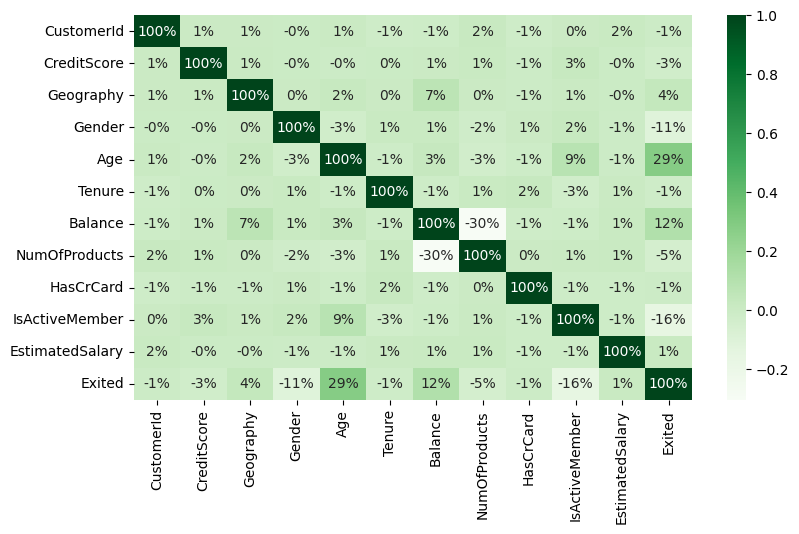

In [10]:
# calculate the correlation matrix on the numeric columns
corr = df_churn.select_dtypes('number').corr()

# plot the heatmap
plt.figure(figsize=(9,5))
sns.heatmap(corr,
            cmap='Greens', 
            annot=True,
            fmt='.0%')

In [11]:
# Split Dataset
predictors = df_churn.drop(['Exited','CustomerId'],axis=1)
targets = df_churn['Exited']

In [12]:
# Get predictors importance
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest to get predictors importance
rf = RandomForestClassifier()
rf.fit(predictors, targets)

# Get feature importances
importances = pd.DataFrame({'Feature':predictors.columns, 'RF Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('RF Importance',ascending=False).set_index('Feature')

In [13]:
#List importances and correlations together
importances = importances.merge(corr['Exited'].to_frame(),left_index=True,right_index=True)
importances['Exited'] = importances['Exited']*100

importances

,RF Importance,Exited
Age,0.241,28.532304
EstimatedSalary,0.149,1.209686
CreditScore,0.144,-2.709354
Balance,0.141,11.853277
NumOfProducts,0.129,-4.781986
Tenure,0.080,-1.400061
IsActiveMember,0.040,-15.612828
Geography,0.037,3.594295
HasCrCard,0.019,-0.713777
Gender,0.018,-10.651249


In [14]:
# We can get rid of 'HasCrCard' and'Geography' due to their low scores on the previus analysis
# Split Dataset

from sklearn.model_selection import train_test_split

predictors = df_churn.drop(['Exited','CustomerId','HasCrCard','Geography'],axis=1)
targets = df_churn['Exited']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(predictors, targets, test_size=0.2)

In [15]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

# Train a logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 79.50%
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1559
           1       0.64      0.16      0.26       441

    accuracy                           0.80      2000
   macro avg       0.72      0.57      0.57      2000
weighted avg       0.77      0.80      0.74      2000



In [16]:
#oversampling to address the imbalance on our data
from imblearn.over_sampling import SMOTE

# define oversampling strategy
oversample = SMOTE()

X_over, y_over = oversample.fit_resample(X_train, y_train)

# Train a logistic regression model
lr_over = LogisticRegression()
lr_over.fit(X_over, y_over)

# Make predictions
y_pred = lr_over.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 68.80%
              precision    recall  f1-score   support

           0       0.88      0.70      0.78      1559
           1       0.38      0.66      0.48       441

    accuracy                           0.69      2000
   macro avg       0.63      0.68      0.63      2000
weighted avg       0.77      0.69      0.71      2000



In [17]:
from sklearn.ensemble import RandomForestClassifier

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(predictors, targets, test_size=0.2)

# Train the model 
rf = RandomForestClassifier() 
rf.fit(X_train, y_train) 

# Predict on the test set 
y_pred = rf.predict(X_test) 

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 85.10%
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1606
           1       0.71      0.41      0.52       394

    accuracy                           0.85      2000
   macro avg       0.79      0.68      0.71      2000
weighted avg       0.84      0.85      0.83      2000



In [18]:
# Oversampling
X_over, y_over = oversample.fit_resample(X_train, y_train)

# Train the model 
rf_over = RandomForestClassifier() 
rf_over.fit(X_over, y_over) 

# Predict on the test set 
y_pred = rf_over.predict(X_test) 

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 82.25%
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1606
           1       0.55      0.53      0.54       394

    accuracy                           0.82      2000
   macro avg       0.72      0.71      0.71      2000
weighted avg       0.82      0.82      0.82      2000



In [19]:
from sklearn.ensemble import GradientBoostingClassifier

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(predictors, targets, test_size=0.2)

# Train the model 
gb = GradientBoostingClassifier() 
gb.fit(X_train, y_train) 

# Predict on the test set 
y_pred = gb.predict(X_test) 

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 85.70%
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1603
           1       0.74      0.44      0.55       397

    accuracy                           0.86      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



In [20]:
# Oversampling
X_over, y_over = oversample.fit_resample(X_train, y_train)

# Train the model 
gb_over = GradientBoostingClassifier() 
gb_over.fit(X_over, y_over) 

# Predict on the test set 
y_pred = gb_over.predict(X_test) 

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 82.15%
              precision    recall  f1-score   support

           0       0.91      0.86      0.89      1603
           1       0.54      0.65      0.59       397

    accuracy                           0.82      2000
   macro avg       0.73      0.76      0.74      2000
weighted avg       0.84      0.82      0.83      2000



In [22]:
#search for better parameters
from sklearn.model_selection import GridSearchCV

# Define the parameter values that should be searched
n_estimators = [100, 200, 300]
max_depth = [1, 5, 10, 20]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)

# Instantiate the model
rf_grid = RandomForestClassifier()

# Instantiate the grid
grid = GridSearchCV(estimator=rf_grid, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid (start the grid search):
grid.fit(X_over, y_over)

# View the results
print(grid.best_score_)
print(grid.best_params_)

0.8915060354965598
{'max_depth': 20, 'n_estimators': 300}


In [23]:
#search for better parameters
n_estimators = [100, 200, 300]
max_depth = [1, 5, 10, 20]

param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)

# Instantiate the model
gb_grid = GradientBoostingClassifier()

# Instantiate the grid
grid = GridSearchCV(estimator=gb_grid, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid (start the grid search):
grid.fit(X_over, y_over)

# View the results
print(grid.best_score_)
print(grid.best_params_)

0.8916726675506194
{'max_depth': 10, 'n_estimators': 300}


In [24]:
# compare the three methods we saw earlier
from sklearn.model_selection import cross_val_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(predictors, targets, test_size=0.2)

# define oversampling strategy
oversample = SMOTE()
X_over, y_over = oversample.fit_resample(X_train, y_train)

# Train lR model
lr = LogisticRegression()
lr_over = LogisticRegression()

# Train RF model 
rf = RandomForestClassifier(n_estimators=300,max_depth=20) 
rf_over = RandomForestClassifier(n_estimators=300,max_depth=20) 

# Train GB model 
gb = GradientBoostingClassifier(n_estimators=300,max_depth=10)  
gb_over = GradientBoostingClassifier(n_estimators=300,max_depth=10)  

In [25]:
# Cross-validation
rf_cv_score = cross_val_score(rf, X_train, y_train, cv=5, scoring='recall')
rf_over_cv_score = cross_val_score(rf_over, X_over, y_over, cv=5, scoring='recall')

lr_cv_score = cross_val_score(lr, X_train, y_train, cv=5, scoring='recall')
lr_over_cv_score = cross_val_score(lr_over, X_over, y_over, cv=5, scoring='recall')

gb_cv_score = cross_val_score(gb, X_train, y_train, cv=5, scoring='recall')
gb_over_cv_score = cross_val_score(gb_over, X_over, y_over, cv=5, scoring='recall')

In [21]:
#show the comparisson results

print(f'Logistic Regression Cross-Validation Score: {np.mean(lr_cv_score):.2f}%')
print(f'Logistic Regression Oversampled Cross-Validation Score: {np.mean(lr_over_cv_score):.2f}%')
print('')
print(f'Random Forest Cross-Validation Score: {np.mean(rf_cv_score):.2f}%')
print(f'Random Forest Oversampled Cross-Validation Score: {np.mean(rf_over_cv_score):.2f}%')
print('')
print(f'Gradient Boosting Cross-Validation Score: {np.mean(gb_cv_score):.2f}%')
print(f'Gradient Boosting Oversampled Cross-Validation Score: {np.mean(gb_over_cv_score):.2f}%')

NameError: name 'lr_cv_score' is not defined

In [22]:
#We have find the best model so far, time to retrieve the customerID data
#If we can predict those customer who are going to churn, we can act on it with a marketing campaing or coupons

# Split Dataset
predictors = df_churn.drop(['Exited','CustomerId'],axis=1)
targets = df_churn['Exited']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(predictors, targets, test_size=0.2)

# define oversampling strategy
oversample = SMOTE()
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [23]:
# Train RF model 
rf_over = RandomForestClassifier(n_estimators=300,max_depth=20) 
rf_over.fit(X_over, y_over) 

# Predict on the test set 
y_pred = rf_over.predict(X_test) 

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}% \n')

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 83.25% 

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1555
           1       0.63      0.59      0.61       445

    accuracy                           0.83      2000
   macro avg       0.76      0.75      0.75      2000
weighted avg       0.83      0.83      0.83      2000



In [24]:
#retrieve customerID
results = X_test.merge(df_churn['CustomerId'],left_index=True,right_index=True)
results['Churn'] = y_test
results['PredictedChurn'] = y_pred

results = results.loc[:, results.columns.isin(['CustomerId','Churn','PredictedChurn'])]

results

,CustomerId,Churn,PredictedChurn
RowNumber,,,
9189,15778192,0,0
6523,15632185,0,0
7178,15697310,0,0
1656,15659105,0,1
1854,15633574,0,1
...,...,...,...
9031,15799635,1,1
819,15591969,0,0
3487,15630661,0,0


In [25]:
#validate result with support from classification_report
results.groupby('Churn')[['CustomerId']].count()

,CustomerId
Churn,
0,1555
1,445


In [26]:
#lets see how many customers we predicted to churn
results.groupby(['Churn','PredictedChurn'])[['CustomerId']].count()

CustomerId
Churn PredictedChurn            
0     0                     1401
      1                      154
1     0                      181
      1                      264

In [29]:
#export churn data
results.query('PredictedChurn == 1')[['CustomerId','PredictedChurn']].to_csv('customer_predictedchurn.csv',index=False)